In [8]:
import numpy as np
import cv2 
import math
import matplotlib.pyplot as plt
 

In [ ]:

renglon = cv2.imread('1.jpeg', cv2.IMREAD_GRAYSCALE)
img = renglon[250:285,200:600]

lower_blue = np.array(10)
upper_blue = np.array(140)
    
    # Umbral de la imagen HSV para obtener solo colores azules
    # mascara 
    
mask = cv2.inRange(img, lower_blue, upper_blue)
res = cv2.bitwise_and(img,img, mask= mask)

plt.imshow(res)
cv2.imwrite('renglon.jpeg',res)
plt.show()

In [ ]:
renglon = cv2.imread('renglon.jpeg')

plt.imshow(renglon)

plt.show()

In [ ]:
### Esqueletización Opcion 1


import scipy.ndimage.morphology as morp



def skeletonize(img):

    struct =  np.array([
        [[[0, 0, 0], [0, 1, 0], [1, 1, 1]],
         [[1, 1, 1], [0, 0, 0], [0, 0, 0]]],

        [[[0, 0, 0], [1, 1, 0], [0, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [0, 0, 0]]],

        [[[0, 0, 1], [0, 1, 1], [0, 0, 1]],
         [[1, 0, 0], [1, 0, 0], [1, 0, 0]]],

        [[[0, 0, 0], [0, 1, 1], [0, 1, 0]],
         [[1, 1, 0], [1, 0, 0], [0, 0, 0]]],

        [[[1, 1, 1], [0, 1, 0], [0, 0, 0]],
         [[0, 0, 0], [0, 0, 0], [1, 1, 1]]],

        [[[0, 1, 0], [0, 1, 1], [0, 0, 0]],
         [[0, 0, 0], [1, 0, 0], [1, 1, 0]]],

        [[[1, 0, 0], [1, 1, 0], [1, 0, 0]],
         [[0, 0, 1], [0, 0, 1], [0, 0, 1]]],

        [[[0, 1, 0], [1, 1, 0], [0, 0, 0]],
         [[0, 0, 0], [0, 0, 1], [0, 1, 1]]]]
        )


    img = img.copy()
    last = ()
    while np.any(img != last):
        last = img
        for s in struct:
            img = np.logical_and(img, np.logical_not(morp.binary_hit_or_miss(img, *s)))
    return img


img = cv2.imread('renglon2.jpeg',0)
ret, img = cv2.threshold(img, 20, 100, 0)
skel = skeletonize(img)

# Para ver el resultado en matplotlib aplicando además interpolación


skelprint=plt.imshow(skel, cmap="gray", interpolation="nearest")
cv2.imwrite('Skelrenglon.jpeg',np.float32(skel))
plt.show()

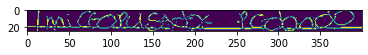

In [2]:
### Esqueletización Opcion 2


img = cv2.imread('renglon2.jpeg',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,10,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

plt.imshow(skel)
cv2.imwrite('Skelrenglon2tipo2.jpeg',skel)
plt.show()

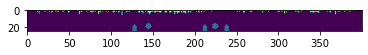

In [13]:
### Proyección vertical................. en proceso...................



#Lee la imagen
image1 = cv2.imread('renglon2.jpeg')
 
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
 
ret, binary = cv2.threshold(gray,130, 255, cv2.THRESH_BINARY)
(h,w) = binary.shape#Return a alto y ancho

#Proyección vertical
vproject = binary.copy()
a = [0 for x in range(0,w)]
# 
for j in range(0,w):#
    for i in range(0,h):#
        if vproject[i,j]==0:#Se el punto se cambia a puntos negros
            a[j]+=1#El mostrador de esta columna más 1 recuento
            vproject[i,j]=255#Después de la grabación, conviértalo en blanco
for j in range(0,w):#Enly Column
    for i in range((h-a[j]),h):#Desde el punto superior de la columna que debe ser negro, comience a ennegrecer la parte inferior
        vproject[i,j]=0 # #
cv2.putText(vproject,"verticality",(50,50),cv2.FONT_HERSHEY_SIMPLEX,1.5,(100,100,100),4)

#   
hproject = binary.copy()
b = [0 for x in range(0,w)]
for j in range(0,h):
    for i in range(0,w):
        if hproject[j,i] == 0:
            b[j] += 1
            hproject[j,i] = 255
for j in range(0,h):
    for i in range(0,b[j]):
        hproject[j,i]=0
cv2.putText(vproject,"verticality",(50,50),cv2.FONT_HERSHEY_SIMPLEX,1.5,(100,100,100),4)


#plt.imshow(image1)
plt.imshow(vproject)
#plt.imshow(hproject)

